In [12]:
# SET 5 – Stock Market Volatility StudyScenario
# A financial analyst is studying stock price behavior and risk.
# Problem Statement
# Create a dataset representing daily stock prices for at least 250 trading days with:

# date, open_price, close_price, volume

# Using Pandas:

# Calculate daily returns and rolling volatility.

# Using NumPy:

# Simulate future stock prices.

# Quantify risk using statistical measures.

# Using a visualization library:

# Plot price trends over time.

# Visualize return distributions.

import numpy as np
import pandas as pd
from faker import Faker

fake=Faker()

dates=sorted(fake.date() for _ in range(250))
print(dates)

open_price=[]
close_price=[]
volume=[]

price=150

for _ in range(250):

    open_pri=price+fake.random_int(-5,5)
    close_pri=open_pri+fake.random_int(-5,5)

    open_price.append(open_pri)
    close_price.append(close_pri)
    volume.append(fake.random_int(50000,500000))

    price=close_pri

df=pd.DataFrame({
    "date":dates,
    "open_price":open_price,
    "closed_price":close_price,
    "volume":volume
})

df.head()

['1970-09-27', '1970-12-14', '1971-08-20', '1971-08-27', '1971-10-03', '1971-12-20', '1972-03-16', '1972-10-21', '1972-12-31', '1973-06-11', '1973-07-28', '1974-01-12', '1974-02-20', '1974-06-02', '1974-06-05', '1974-10-18', '1974-11-22', '1974-12-14', '1974-12-14', '1974-12-25', '1975-02-27', '1975-05-01', '1975-07-04', '1975-10-10', '1975-10-15', '1975-11-15', '1975-11-27', '1975-11-29', '1975-12-20', '1976-04-18', '1976-08-16', '1976-09-22', '1977-07-28', '1977-10-14', '1978-01-24', '1978-03-31', '1978-04-13', '1978-05-05', '1978-05-28', '1978-05-28', '1978-12-22', '1979-08-07', '1979-09-17', '1979-11-03', '1979-11-16', '1980-01-30', '1980-03-22', '1981-02-17', '1981-07-13', '1981-08-21', '1981-11-11', '1982-02-12', '1982-05-18', '1982-07-11', '1982-08-23', '1982-11-10', '1983-03-03', '1983-04-08', '1983-04-21', '1983-05-07', '1983-06-28', '1983-07-06', '1983-09-25', '1984-01-27', '1984-09-16', '1984-09-26', '1984-10-07', '1984-12-04', '1985-06-12', '1985-11-10', '1986-07-03', '1986

,date,open_price,closed_price,volume
0,1970-09-27,154,152,329225
1,1970-12-14,157,159,149262
2,1971-08-20,155,158,269218
3,1971-08-27,161,160,374309
4,1971-10-03,162,164,440748


In [21]:
# Calculate daily returns and rolling volatility.
df['daily_return']=df["closed_price"].pct_change()*100

df['rolling_volatality']=df['daily_return'].rolling(window=10).std()
df.head(15)

,date,open_price,closed_price,volume,daily_return,rolling_volatality
0,1970-09-27,154,152,329225,NaN,NaN
1,1970-12-14,157,159,149262,4.605263,NaN
2,1971-08-20,155,158,269218,-0.628931,NaN
3,1971-08-27,161,160,374309,1.265823,NaN
4,1971-10-03,162,164,440748,2.500000,NaN
5,1971-12-20,169,165,446948,0.609756,NaN
6,1972-03-16,170,169,237762,2.424242,NaN
7,1972-10-21,168,167,50828,-1.183432,NaN
8,1972-12-31,169,164,472966,-1.796407,NaN
9,1973-06-11,162,164,381895,0.000000,NaN


In [26]:
# Simulate future stock prices.

last_p=df["closed_price"].iloc[-1]
return_mean=(df["daily_return"]/100).mean()
volatality=(df["daily_return"]/100).std()

future_p=[last_p]

for _ in range(30):
    next_price=future_p[-1]*np.exp(return_mean-0.5*volatality**2+volatality*np.random.normal())
    future_p.append(next_price)

future_df=pd.DataFrame({
    "day":range(1,32),
    "Future_price":future_p
})

future_df


,day,Future_price
0,1,146.000000
1,2,140.723987
2,3,135.277952
3,4,132.574656
4,5,136.361861
5,6,140.573251
6,7,139.840030
7,8,136.927933
8,9,137.531362
9,10,133.941637


In [34]:
# Quantify risk using statistical measures.
risk={
    "Mean return":(df["daily_return"]/100).mean(),
    "volatality":(df["daily_return"]/100).std(),
    "variance":(df["daily_return"]/100).var(),
    "risk value":np.percentile((df["daily_return"]/100).dropna(),5)

}

risk

{'Mean return': np.float64(0.0001754532095546678),
 'volatality': np.float64(0.026015622123833303),
 'variance': np.float64(0.0006768125944900848),
 'risk value': np.float64(-0.04502288329519448)}

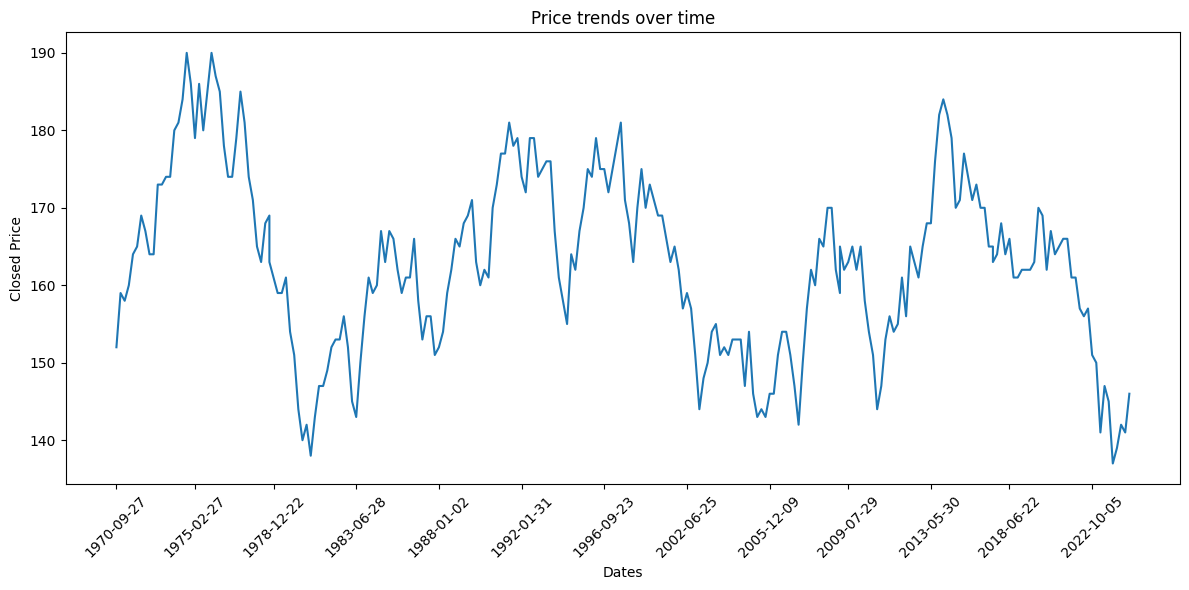

In [37]:
# Using a visualization library:

# Plot price trends over time.

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'],df['closed_price'])
plt.xlabel("Dates")
plt.ylabel("Closed Price")
plt.title("Price trends over time")


plt.xticks(df["date"][::20],rotation=45)
plt.tight_layout()
plt.show()

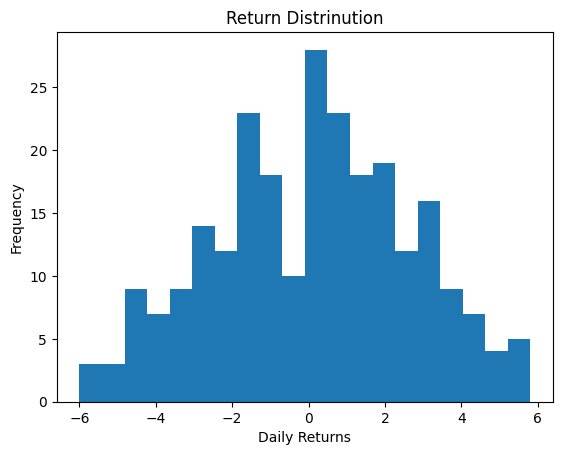

In [38]:
# Visualize return distributions.
plt.hist(df["daily_return"].dropna(),bins=20)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Return Distrinution")
plt.show()